In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

/home/sebastian/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/sebastian/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


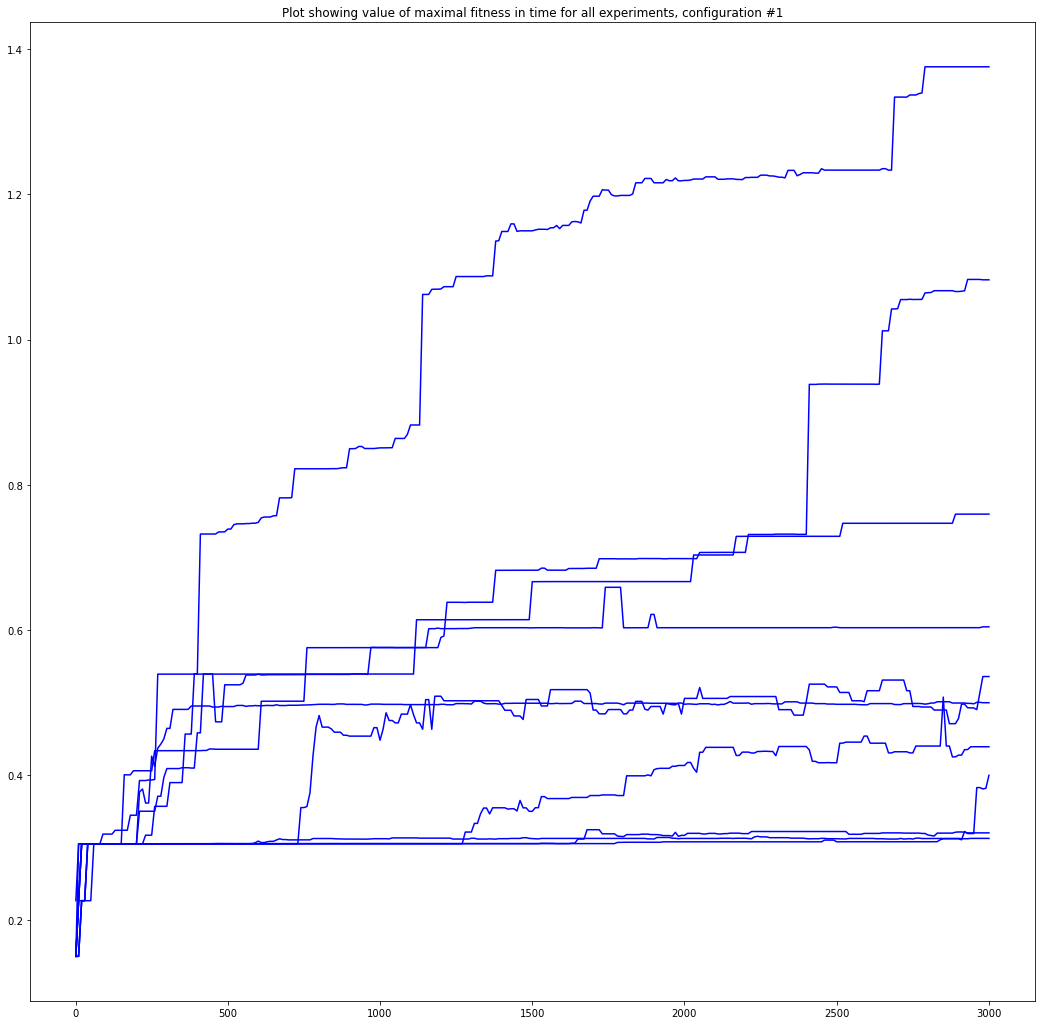

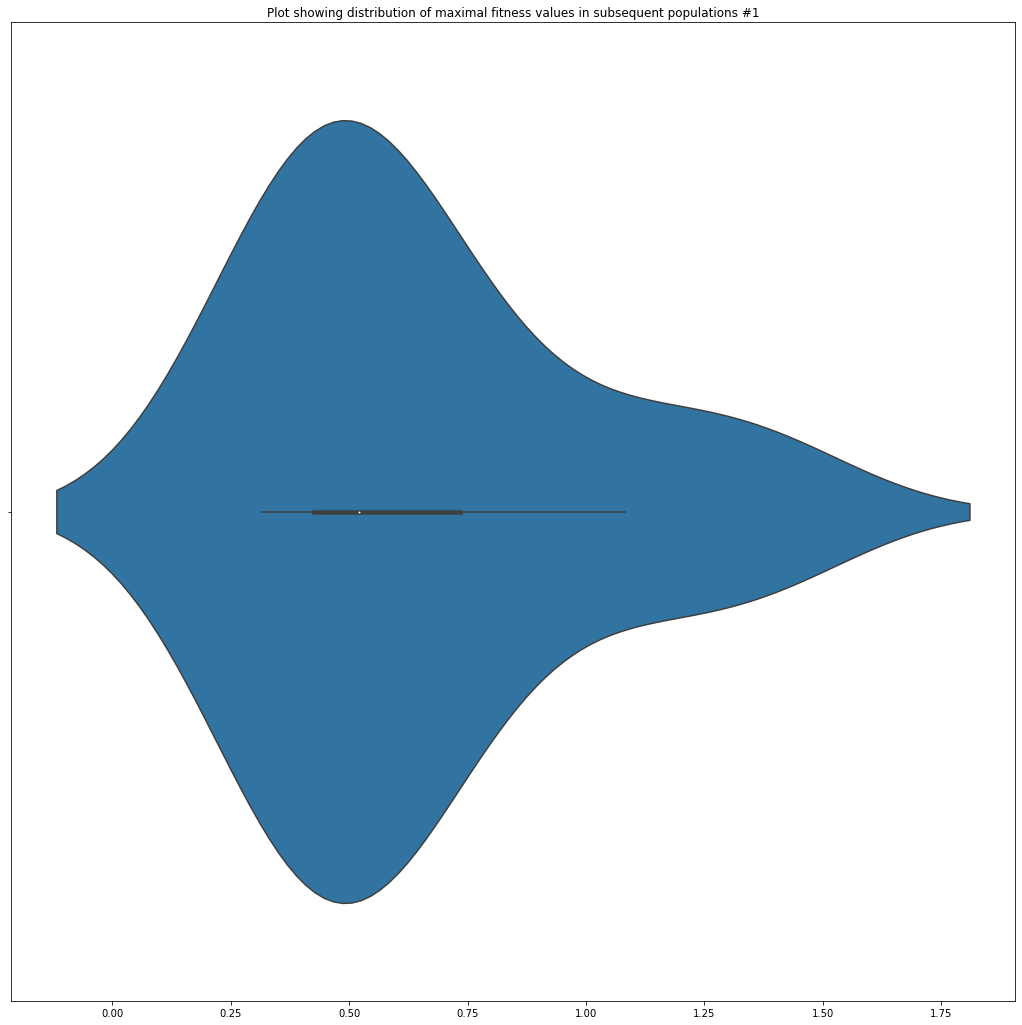

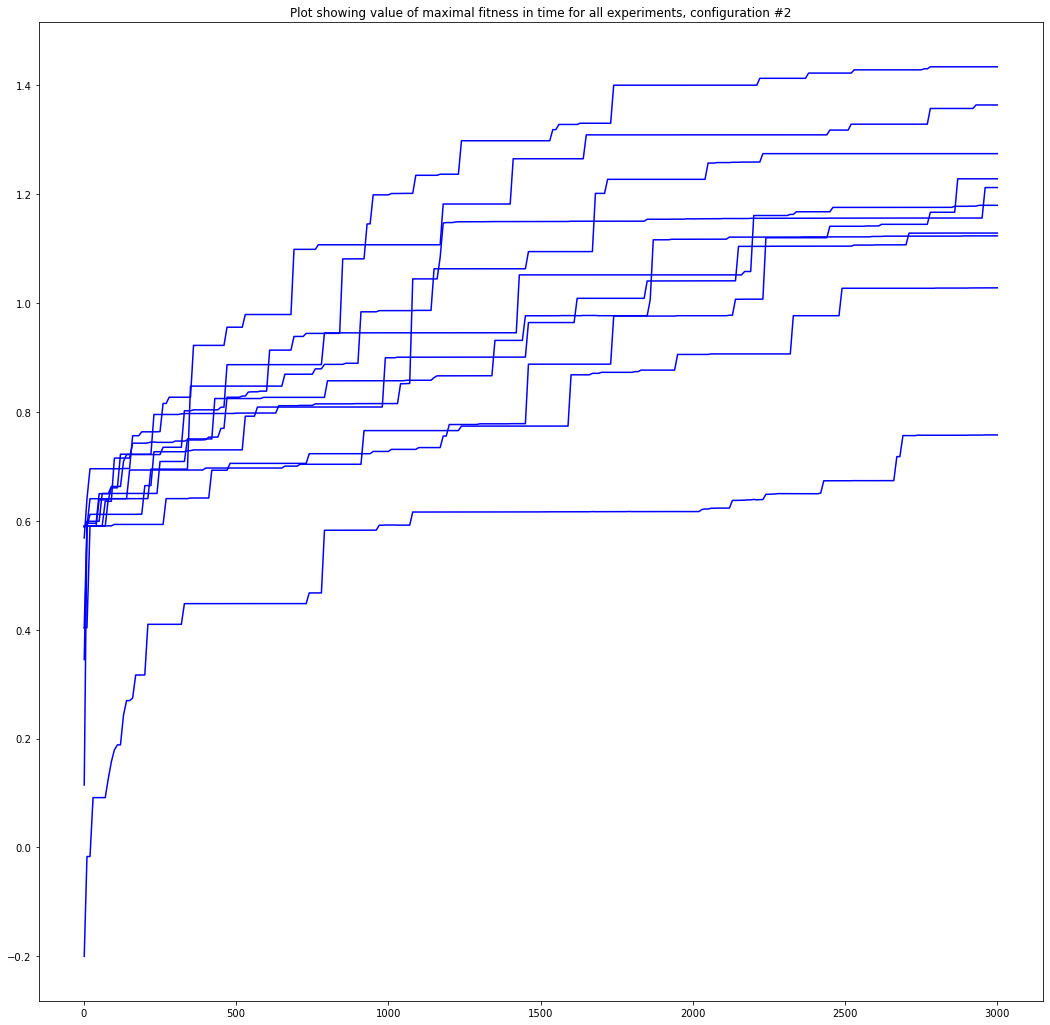

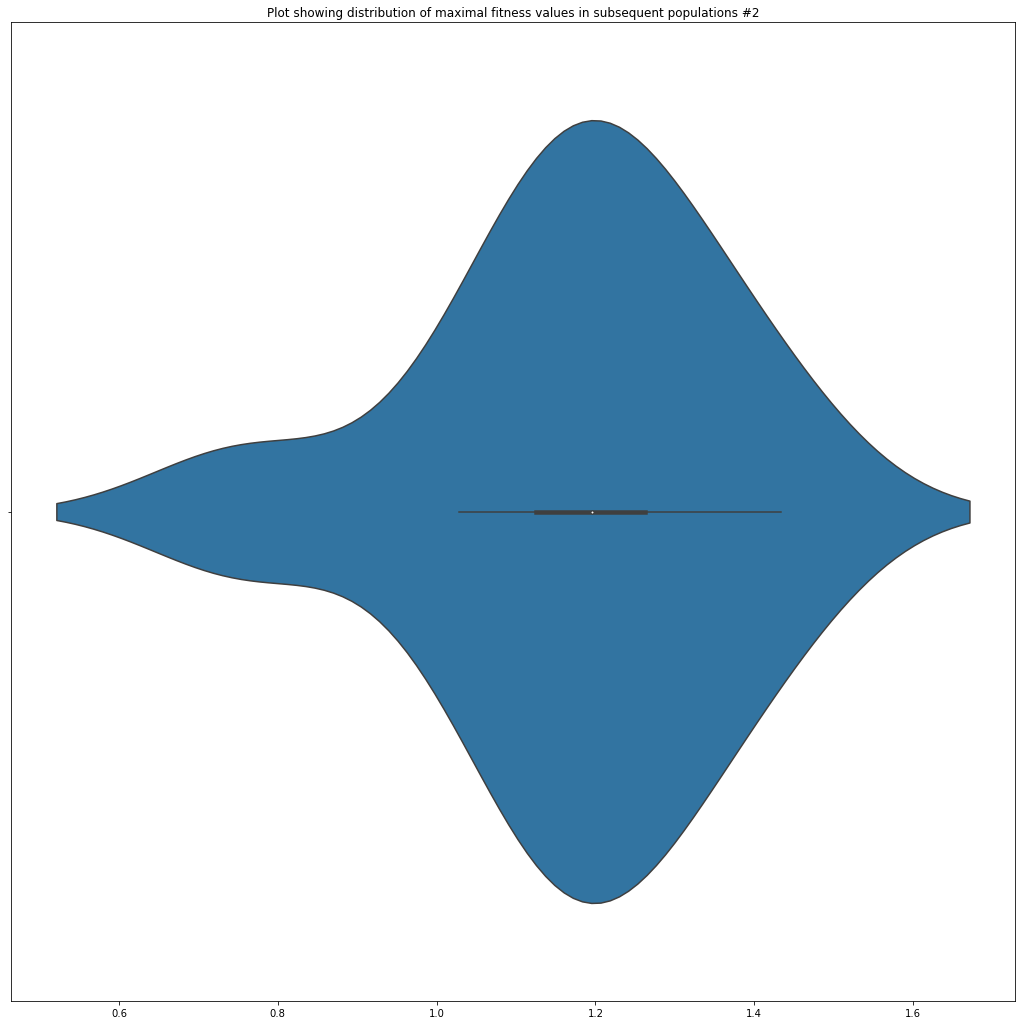

In [91]:
for _j in range(1, 3):
    fig, ax = plt.subplots(1, 1, figsize=(18,18))
    all_fits = []
    for _i in range(10):
        fit = []
        times = []
        with open(f'Framsticks43/expers/e{_j}/solution{_i}.txt') as to_parse:
            lines = to_parse.readlines()
            for x in lines:
                if x[:2] != 'Sc':
                    continue
                times.append(int(x.split(' ')[2]))
                fit.append(float(x.split(' ')[6]))

        fit = [x if x>-0.2 else -0.2 for x in fit]
        all_fits.append(max(fit))
        ax.plot(times, fit, color='#0000FF')
        ax.set_title(f'Plot showing value of maximal fitness in time for all experiments, configuration #{_j}')
    plt.savefig(f'vizes/experiments_{_j}.svg', bbox_inches='tight')
    fig, ax = plt.subplots(1, 1, figsize=(18,18))
    ax.set_title(f'Plot showing distribution of maximal fitness values in subsequent populations #{_j}')
    sns.violinplot(all_fits, ax=ax)
    plt.savefig(f'vizes/distribs_{_j}.svg', bbox_inches='tight')

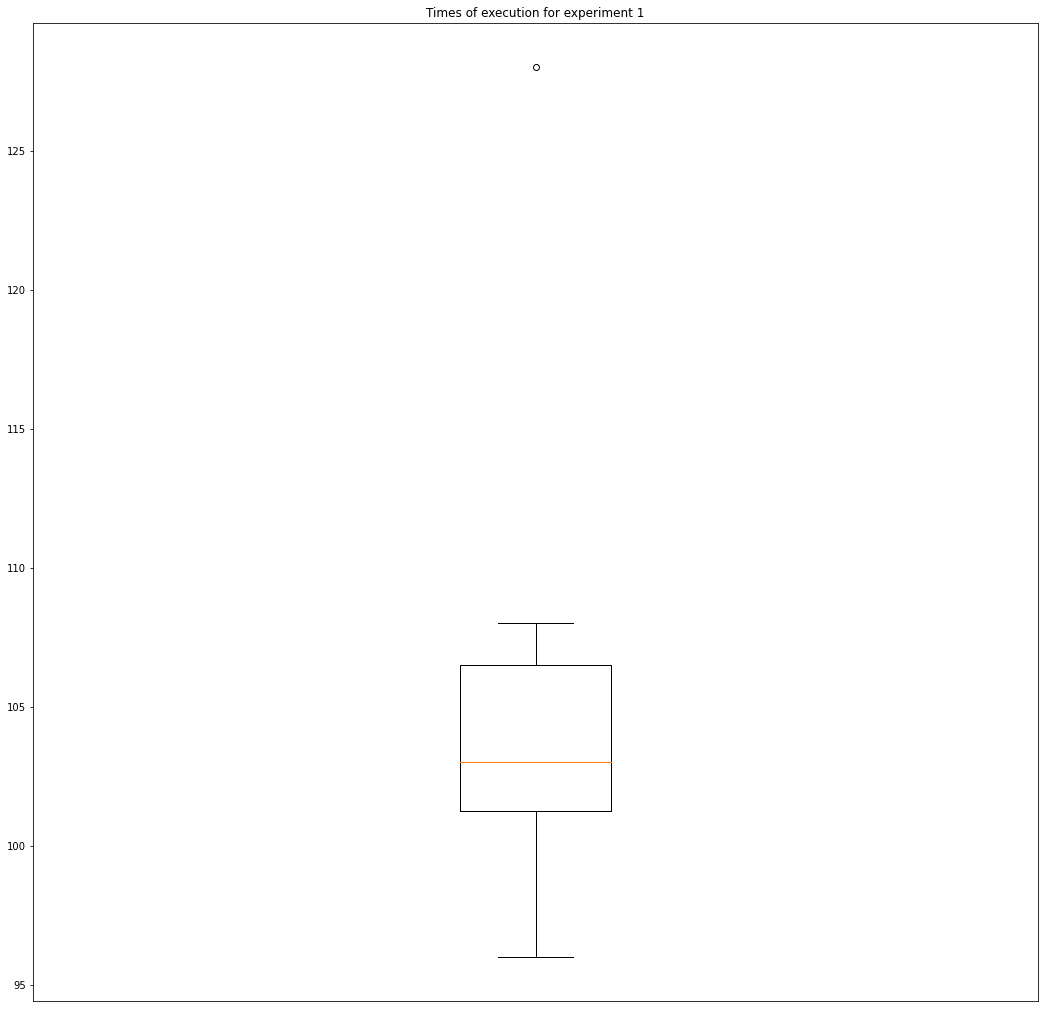

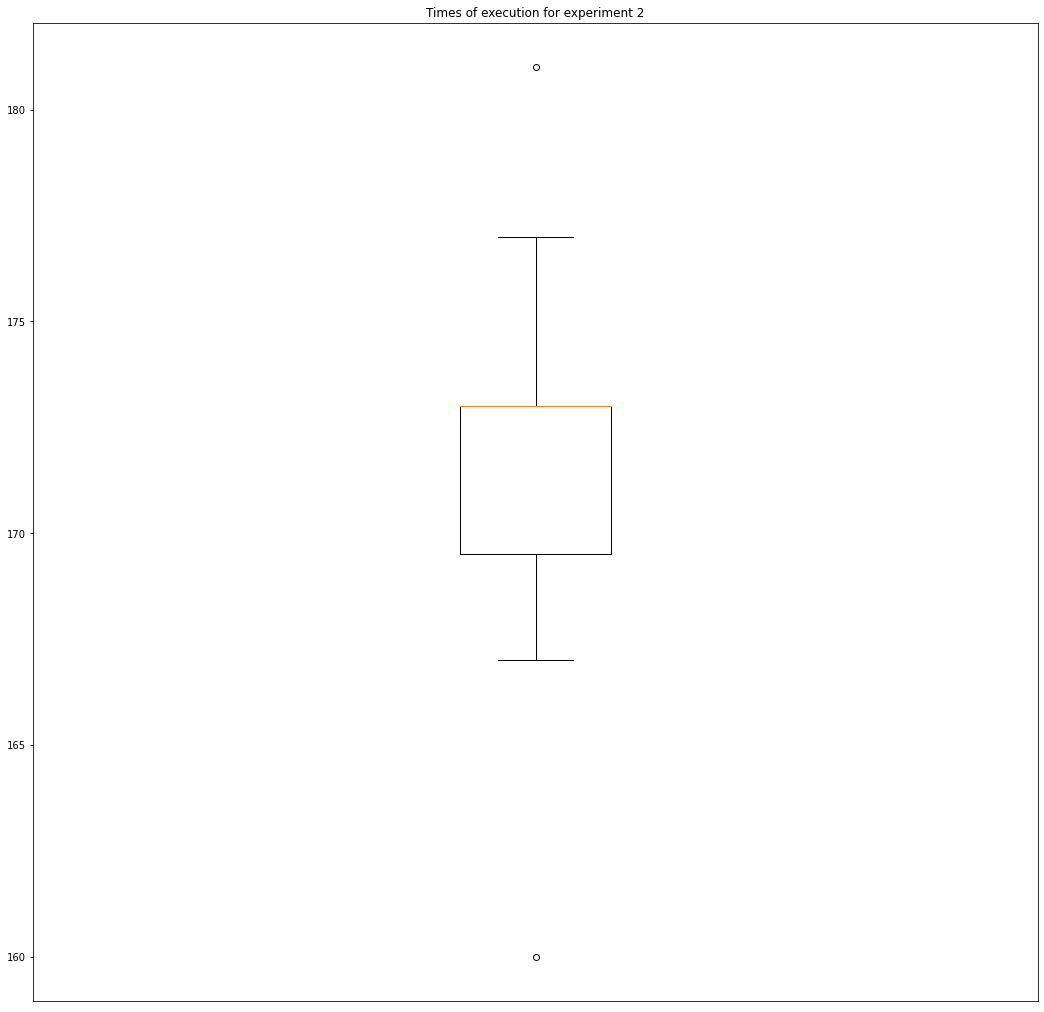

In [89]:
def secs(timerio):
    return int(timerio[0:2])*3600 + int(timerio[3:5])*60 + int(timerio[6:8])

with open(f'Framsticks43/times.txt') as to_parse:
    lines = to_parse.readlines()
    for _j in range(1, 3):
        zeits=[]
        fig, ax = plt.subplots(1, 1, figsize=(18,18))
        for _i in range(10):
            interest = [x for x in lines if int(x[1]) == _j and int(x[2]) == _i]
            zeit = secs(interest[1][26:34]) - secs(interest[0][28:36])
            zeits.append(zeit)
        ax.boxplot(zeits)
        ax.set_title(f'Times of execution for experiment {_j}')
        ax.set_xticks([])
        plt.savefig(f'vizes/times_{_j}.svg', bbox_inches='tight')

In [ ]:
|